In [1]:
%run 00_analysis_config.ipynb

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)


Welcome to JupyROOT 6.24/06

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [2]:
import visualization, util, event, cutflow, detector
importlib.reload(event)
importlib.reload(visualization)
importlib.reload(util)
importlib.reload(detector)
import visualization as vis
reload(vis)


<module 'visualization' from '/project/def-mdiamond/tomren/jupyter/Mu_helper/muhelper/visualization.py'>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import scipy.signal
%config InlineBackend.figure_format='retina'

In [4]:
def finetime_calib(times, low=None, high=None):
    if low is None:
        times = np.array(times)
        mask = (times > 4)& (times < 1000)
        low = np.min(times[mask])
        high=np.max(times[mask])
        
    total_uncalib = high-low
    return (times-low)/total_uncalib*25

In [5]:
DATA_DIR = "/project/rrg-mdiamond/tomren/mudata/MP0100/DT5550W/"

In [6]:
# ls -l /project/rrg-mdiamond/tomren/mudata/MP0100/DT5550W/ -ltrh

### Get finetime calibration with a different dataset:


In [9]:
filename = f"{DATA_DIR}/15.data"
data  = pd.read_csv(filename, sep=';', on_bad_lines  = "skip", usecols=["CHARGE_0", "FINE_0","RUN_EventTimecode_ns"])
ch = "0"
ftime_min=np.min(data[f"FINE_{ch}"])
ftime_max=np.max(data[f"FINE_{ch}"])

### Inspect one file

In [ ]:
filename = f"{DATA_DIR}/16.data"
data  = pd.read_csv(filename, sep=';', on_bad_lines  = "skip", usecols=["CHARGE_0", "FINE_0","RUN_EventTimecode_ns"])
ch = "0"
data[f"FINE_calib_{ch}"] = finetime_calib(data[f"FINE_{ch}"], low=ftime_min, high=ftime_max)
# data[f"FINE_calib_{ch}"] = data[f"FINE_{ch}"]/1024*25

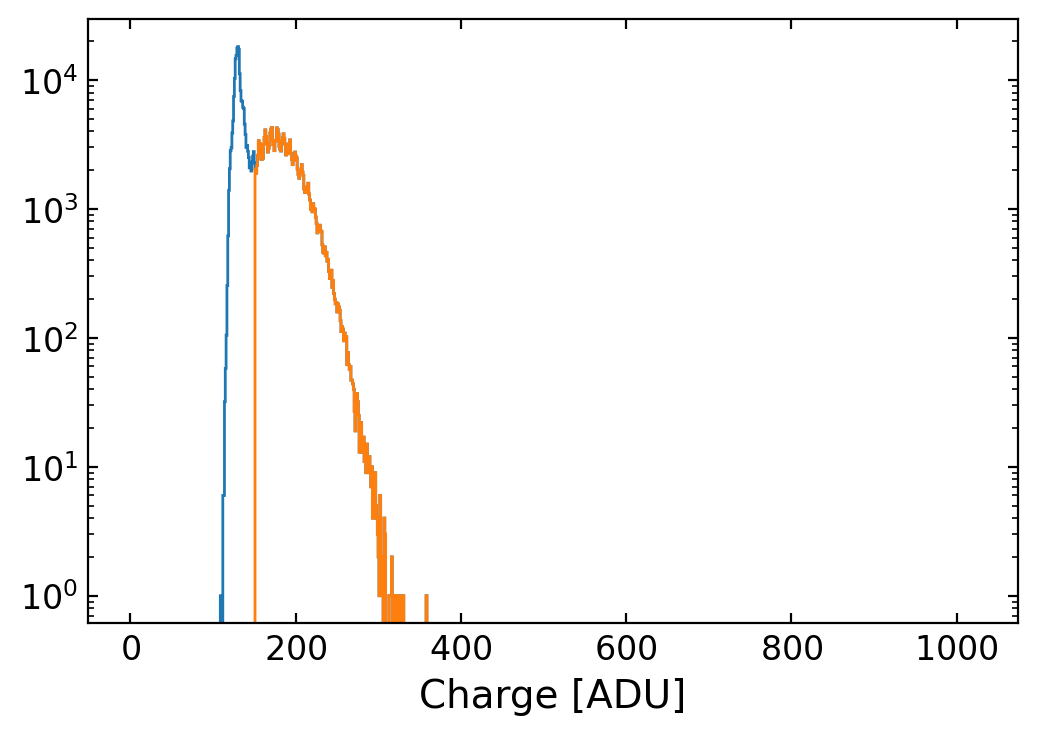

0.7056771455452245 [ns]


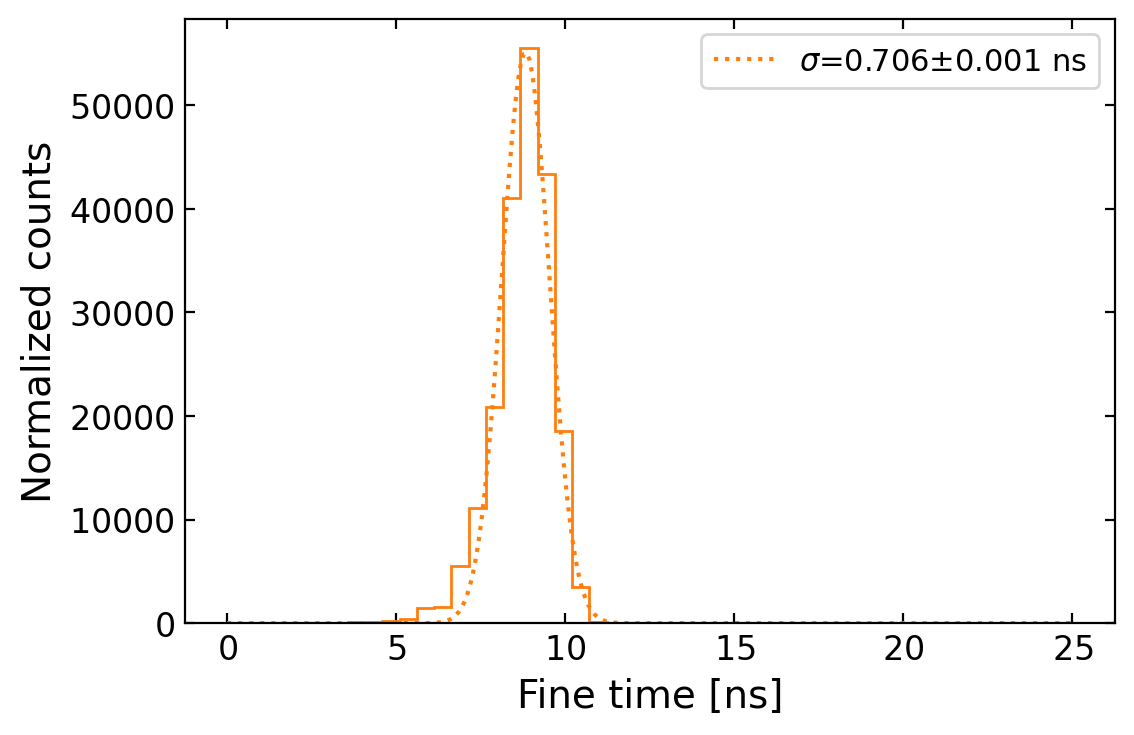

In [88]:
threshold=150

hist(data[f"CHARGE_{ch}"],bins=1023,range=(0,1023),histtype="step");
hist(data[f"CHARGE_{ch}"][data["CHARGE_0"]>threshold],bins=1023,range=(0,1023),histtype="step");
# yscale("log")
xlabel("Charge [ADU]")
yscale("log")
show()

ft_plot = data[f"FINE_calib_{ch}"][data["CHARGE_0"]>threshold]
ft_mean = np.mean(ft_plot)
ft_std = np.std(ft_plot)
ft_std = max([0.1,ft_std])
range_low = np.max([0, ft_mean-15*ft_std])
range_high = np.min([25, ft_mean+15*ft_std])
bins=np.linspace(range_low,range_high,50)
bins_fit=np.linspace(range_low,range_high,300)
# bins=np.linspace(5,14,60)

n,ibins,_ = hist(ft_plot, bins=bins,label="", density=0, histtype="step", color="C1");
# n1,ibins,_ = hist(data[f"FINE_calib_{ch}"][data["CHARGE_0"]<threshold], bins=bins,label="Dark current", density=0, histtype="step");
bincenters=0.5*(ibins[1:]+ibins[:-1])
yerr=np.sqrt(n);yerr[yerr==0]=1

popt1,pcov = rt.fit_tg(bincenters,n,yerr=yerr,function="gaus",fit_range=(ft_mean-5*ft_std,ft_mean+5*ft_std))
perr1 = np.sqrt(np.diag(pcov))
print(popt1[2],'[ns]')
plot(bins_fit, util.Utils.Gauss(bins_fit,*popt1),color="C1",linestyle=":",label=f"$\sigma$={popt1[2]:.3f}$\pm${perr1[2]:.3f} ns" )
# plot(bincenters, util.Utils.Gauss(bincenters,*popt1),color="C0",label=f"$\sigma$={popt1[2]:.1f}$\pm${perr1[2]:.1f} \n "+r"$\bar{x}$"+f"={popt1[1]:.1f}$\pm${perr1[1]:.1f} "  )

xlabel("Fine time [ns]")
ylabel("Normalized counts")
legend(fontsize=11)
# yscale("log")

---

findfont: Font family ['san-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['san-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['san-serif'] not found. Falling back to DejaVu Sans.


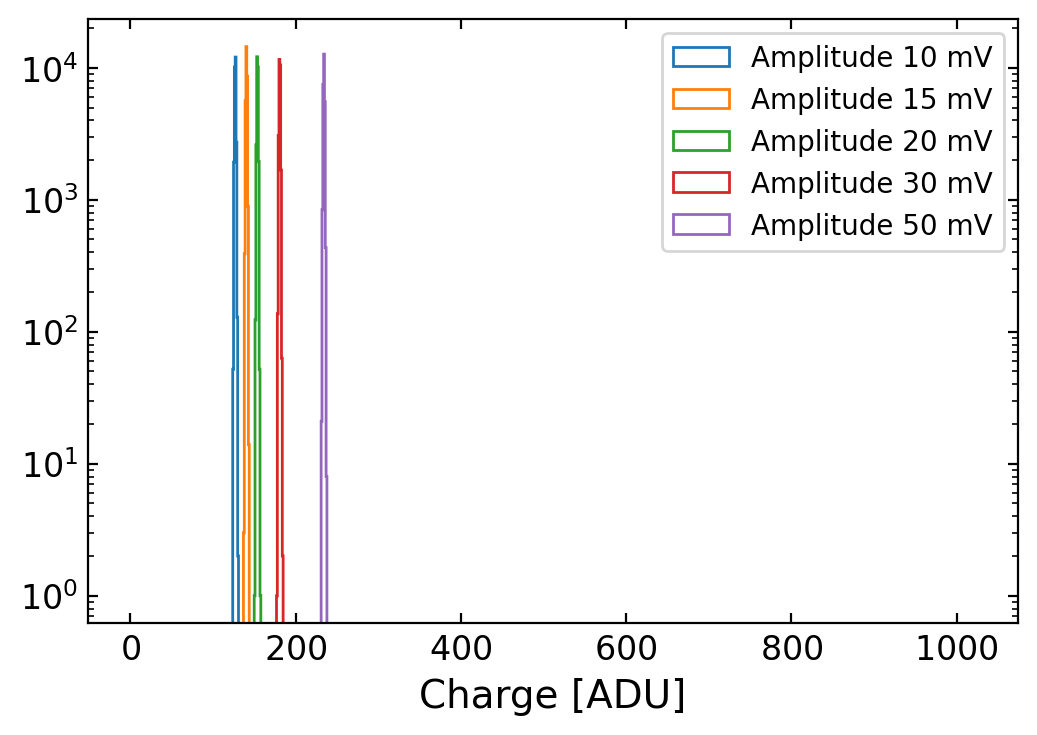

In [6]:
file_idx = [23,33,34,38,42]
amplitudes=[10,15,20,30,50]

for i in range(len(file_idx)):

    filename = f"{DATA_DIR}/{file_idx[i]}.data"
    data  = pd.read_csv(filename, sep=';', on_bad_lines  = "skip", usecols=["CHARGE_0", "FINE_0","RUN_EventTimecode_ns"])
    ch = "0"
    # data[f"FINE_calib_{ch}"] = finetime_calib(data[f"FINE_{ch}"], low=ftime_min, high=ftime_max)
    
    hist(data[f"CHARGE_{ch}"],bins=1023,range=(0,1023),histtype="step",label=f"Amplitude {amplitudes[i]} mV");
    # yscale("log")
xlabel("Charge [ADU]")
yscale("log")
legend(fontsize=10,loc="best")
show()    

0.04021602563180893 [ns]
0.06403981526295066 [ns]
0.06518558443924473 [ns]
0.23937072054780495 [ns]
0.21777516170763198 [ns]
0.5206336269392933 [ns]


Text(0.5, 1.0, 'Amplitude 10 mV')

findfont: Font family ['san-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['san-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['san-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['san-serif'] not found. Falling back to DejaVu Sans.


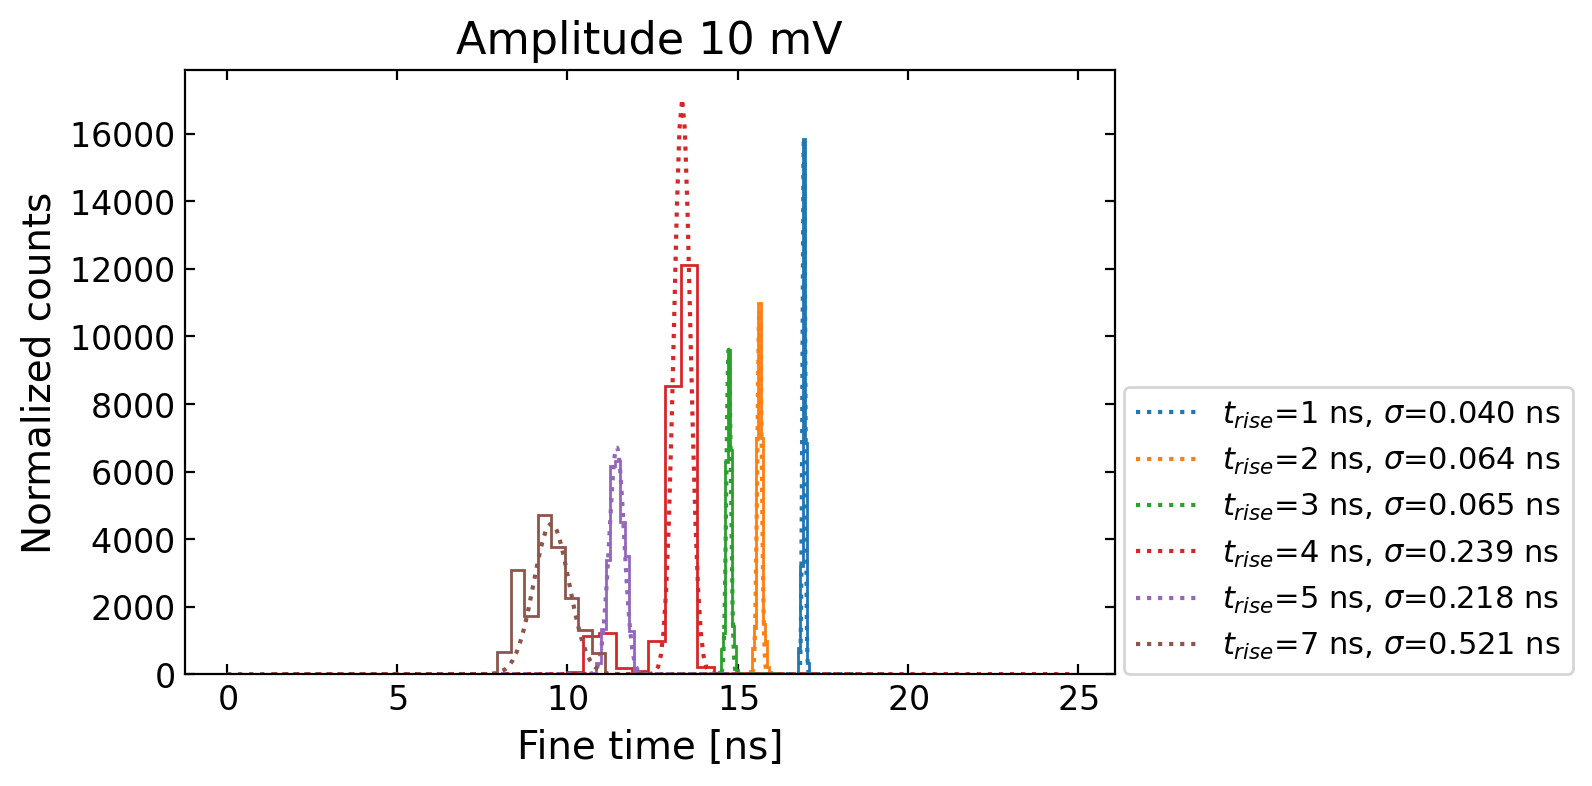

In [10]:
file_idx = [23,24,25,26,27,28]
risetimes=[1,2,3,4,5,7]

for i in range(len(file_idx)):

    filename = f"{DATA_DIR}/{file_idx[i]}.data"
    data  = pd.read_csv(filename, sep=';', on_bad_lines  = "skip", usecols=["CHARGE_0", "FINE_0","RUN_EventTimecode_ns"])
    ch = "0"
    data[f"FINE_calib_{ch}"] = finetime_calib(data[f"FINE_{ch}"], low=ftime_min, high=ftime_max)


    threshold=100

    ft_plot = data[f"FINE_calib_{ch}"][data["CHARGE_0"]>threshold]
    ft_mean = np.mean(ft_plot)
    ft_std = np.std(ft_plot)
    ft_std = max([0.1,ft_std])
    range_low = np.max([0, ft_mean-15*ft_std])
    range_high = np.min([25, ft_mean+15*ft_std])
    bins=np.linspace(range_low,range_high,50)
    bins_fit=np.linspace(range_low,range_high,300)
    # bins=np.linspace(5,14,60)

    n,ibins,_ = hist(ft_plot, bins=bins,label="", density=0, histtype="step", color=f"C{i}");
    # n1,ibins,_ = hist(data[f"FINE_calib_{ch}"][data["CHARGE_0"]<threshold], bins=bins,label="Dark current", density=0, histtype="step");
    bincenters=0.5*(ibins[1:]+ibins[:-1])
    yerr=np.sqrt(n);yerr[yerr==0]=1

    popt1,pcov = rt.fit_tg(bincenters,n,yerr=yerr,function="gaus",fit_range=(ft_mean-5*ft_std,ft_mean+5*ft_std))
    perr1 = np.sqrt(np.diag(pcov))
    print(popt1[2],'[ns]')
    plot(bins_fit, util.Utils.Gauss(bins_fit,*popt1),color=f"C{i}",linestyle=":",label=r"$t_{rise}$"+f"={risetimes[i]} ns, "+f"$\sigma$={popt1[2]:.3f} ns" )
# plot(bincenters, util.Utils.Gauss(bincenters,*popt1),color="C0",label=f"$\sigma$={popt1[2]:.1f}$\pm${perr1[2]:.1f} \n "+r"$\bar{x}$"+f"={popt1[1]:.1f}$\pm${perr1[1]:.1f} "  )

xlabel("Fine time [ns]")
ylabel("Normalized counts")
legend(fontsize=11,loc=(1.01,0))
title("Amplitude 10 mV")
# yscale("log")

0.03207332324376485 [ns]
0.09581077981539002 [ns]
0.11159501838007231 [ns]
0.43430914961087347 [ns]


Text(0.5, 1.0, 'Amplitude 15 mV')

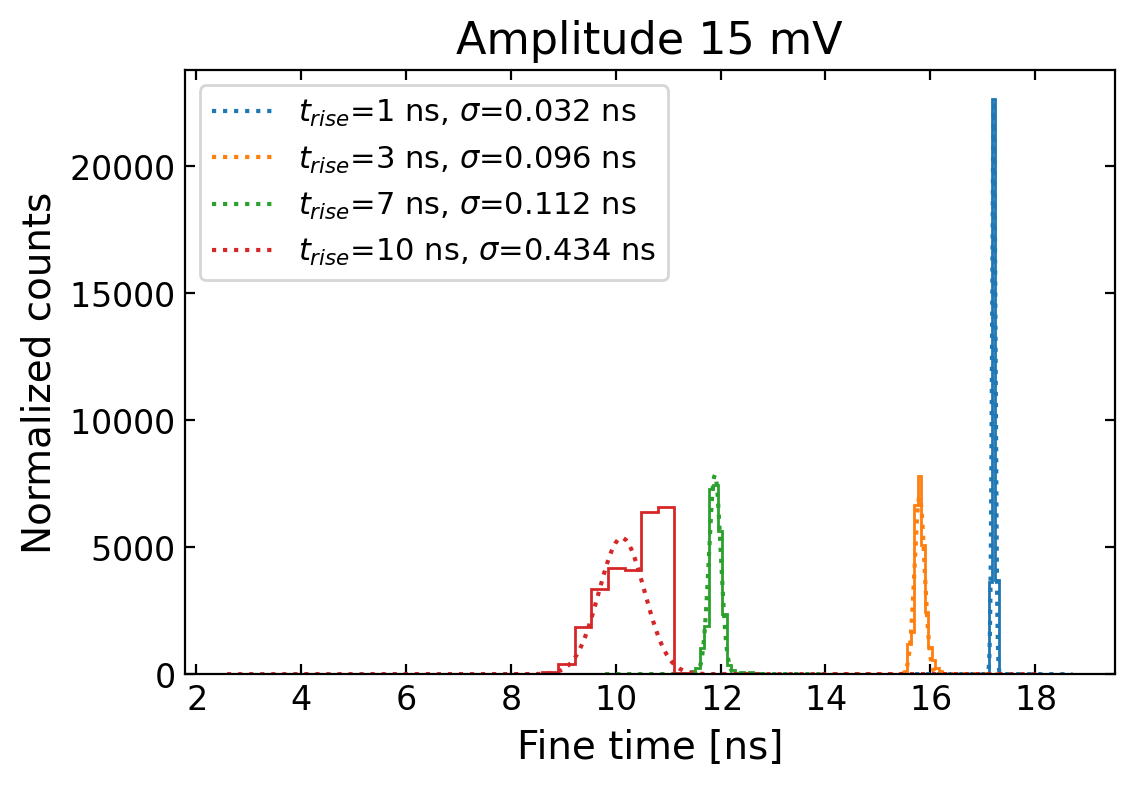

In [65]:
amplitude=15
file_idx = [33, 32, 31, 30]
risetimes=[1,3, 7, 10]

for i in range(len(file_idx)):

    filename = f"{DATA_DIR}/{file_idx[i]}.data"
    data  = pd.read_csv(filename, sep=';', on_bad_lines  = "skip", usecols=["CHARGE_0", "FINE_0","RUN_EventTimecode_ns"])
    ch = "0"
    data[f"FINE_calib_{ch}"] = finetime_calib(data[f"FINE_{ch}"], low=ftime_min, high=ftime_max)


    threshold=100

    ft_plot = data[f"FINE_calib_{ch}"][data["CHARGE_0"]>threshold]
    ft_mean = np.mean(ft_plot)
    ft_std = np.std(ft_plot)
    ft_std = max([0.1,ft_std])
    bins=np.linspace(ft_mean-15*ft_std,ft_mean+15*ft_std,50)
    bins_fit=np.linspace(ft_mean-15*ft_std,ft_mean+15*ft_std,300)
    # bins=np.linspace(5,14,60)

    n,ibins,_ = hist(ft_plot, bins=bins,label="", density=0, histtype="step", color=f"C{i}");
    # n1,ibins,_ = hist(data[f"FINE_calib_{ch}"][data["CHARGE_0"]<threshold], bins=bins,label="Dark current", density=0, histtype="step");
    bincenters=0.5*(ibins[1:]+ibins[:-1])
    yerr=np.sqrt(n);yerr[yerr==0]=1

    popt1,pcov = rt.fit_tg(bincenters,n,yerr=yerr,function="gaus",fit_range=(ft_mean-5*ft_std,ft_mean+5*ft_std))
    perr1 = np.sqrt(np.diag(pcov))
    print(popt1[2],'[ns]')
    plot(bins_fit, util.Utils.Gauss(bins_fit,*popt1),color=f"C{i}",linestyle=":",label=r"$t_{rise}$"+f"={risetimes[i]} ns, "+f"$\sigma$={popt1[2]:.3f} ns" )
# plot(bincenters, util.Utils.Gauss(bincenters,*popt1),color="C0",label=f"$\sigma$={popt1[2]:.1f}$\pm${perr1[2]:.1f} \n "+r"$\bar{x}$"+f"={popt1[1]:.1f}$\pm${perr1[1]:.1f} "  )

xlabel("Fine time [ns]")
ylabel("Normalized counts")
legend(fontsize=10,loc="best")
title(f"Amplitude {amplitude} mV")
# yscale("log")

0.032007148624918554 [ns]
0.0420204106315711 [ns]
0.19642111176638202 [ns]
0.15214059020380338 [ns]


Text(0.5, 1.0, 'Amplitude 20 mV')

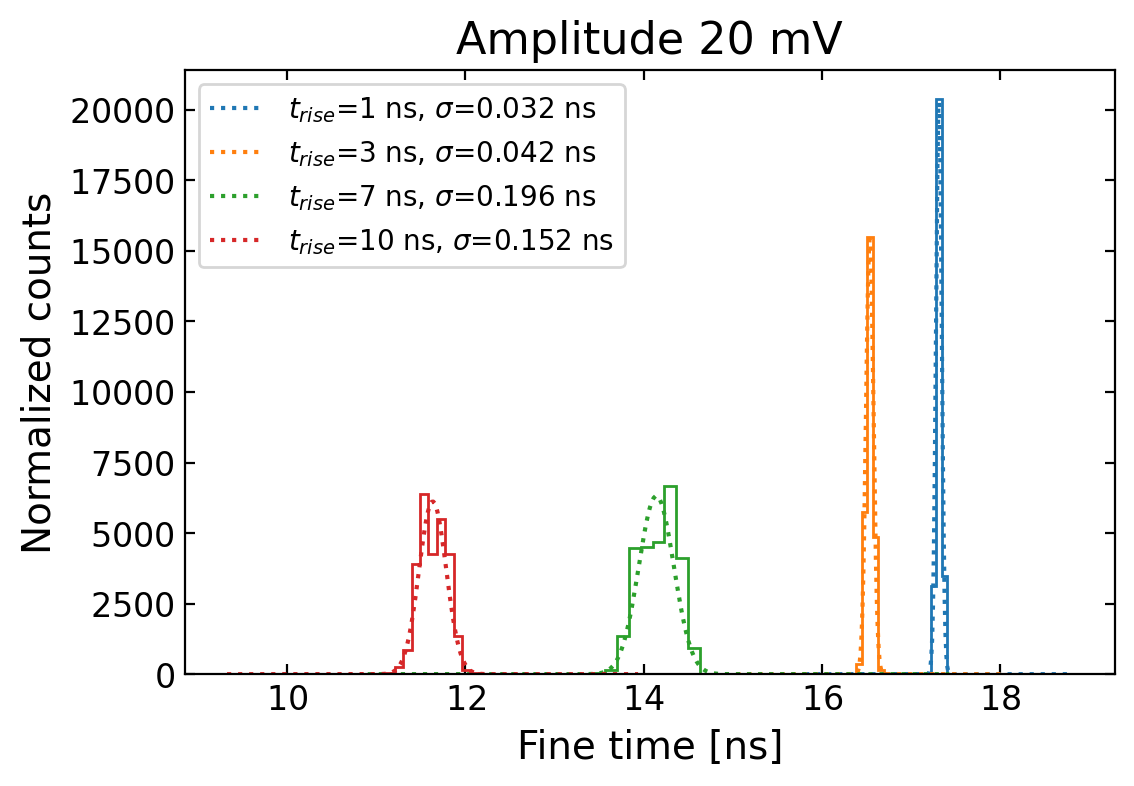

In [69]:
amplitude=20
file_idx = [34, 35, 36, 37]
risetimes=[1,3, 7, 10]

for i in range(len(file_idx)):

    filename = f"{DATA_DIR}/{file_idx[i]}.data"
    data  = pd.read_csv(filename, sep=';', on_bad_lines  = "skip", usecols=["CHARGE_0", "FINE_0","RUN_EventTimecode_ns"])
    ch = "0"
    data[f"FINE_calib_{ch}"] = finetime_calib(data[f"FINE_{ch}"], low=ftime_min, high=ftime_max)


    threshold=100

    ft_plot = data[f"FINE_calib_{ch}"][data["CHARGE_0"]>threshold]
    ft_mean = np.mean(ft_plot)
    ft_std = np.std(ft_plot)
    ft_std = max([0.1,ft_std])
    bins=np.linspace(ft_mean-15*ft_std,ft_mean+15*ft_std,50)
    bins_fit=np.linspace(ft_mean-15*ft_std,ft_mean+15*ft_std,300)
    # bins=np.linspace(5,14,60)

    n,ibins,_ = hist(ft_plot, bins=bins,label="", density=0, histtype="step", color=f"C{i}");
    # n1,ibins,_ = hist(data[f"FINE_calib_{ch}"][data["CHARGE_0"]<threshold], bins=bins,label="Dark current", density=0, histtype="step");
    bincenters=0.5*(ibins[1:]+ibins[:-1])
    yerr=np.sqrt(n);yerr[yerr==0]=1

    popt1,pcov = rt.fit_tg(bincenters,n,yerr=yerr,function="gaus",fit_range=(ft_mean-5*ft_std,ft_mean+5*ft_std))
    perr1 = np.sqrt(np.diag(pcov))
    print(popt1[2],'[ns]')
    plot(bins_fit, util.Utils.Gauss(bins_fit,*popt1),color=f"C{i}",linestyle=":",label=r"$t_{rise}$"+f"={risetimes[i]} ns, "+f"$\sigma$={popt1[2]:.3f} ns" )
# plot(bincenters, util.Utils.Gauss(bincenters,*popt1),color="C0",label=f"$\sigma$={popt1[2]:.1f}$\pm${perr1[2]:.1f} \n "+r"$\bar{x}$"+f"={popt1[1]:.1f}$\pm${perr1[1]:.1f} "  )

xlabel("Fine time [ns]")
ylabel("Normalized counts")
legend(fontsize=10,loc="best")
title(f"Amplitude {amplitude} mV")
# yscale("log")

0.03223896432371659 [ns]
0.049346265139834665 [ns]
0.06210482491479002 [ns]
0.08968969401219874 [ns]


Text(0.5, 1.0, 'Amplitude 30 mV')

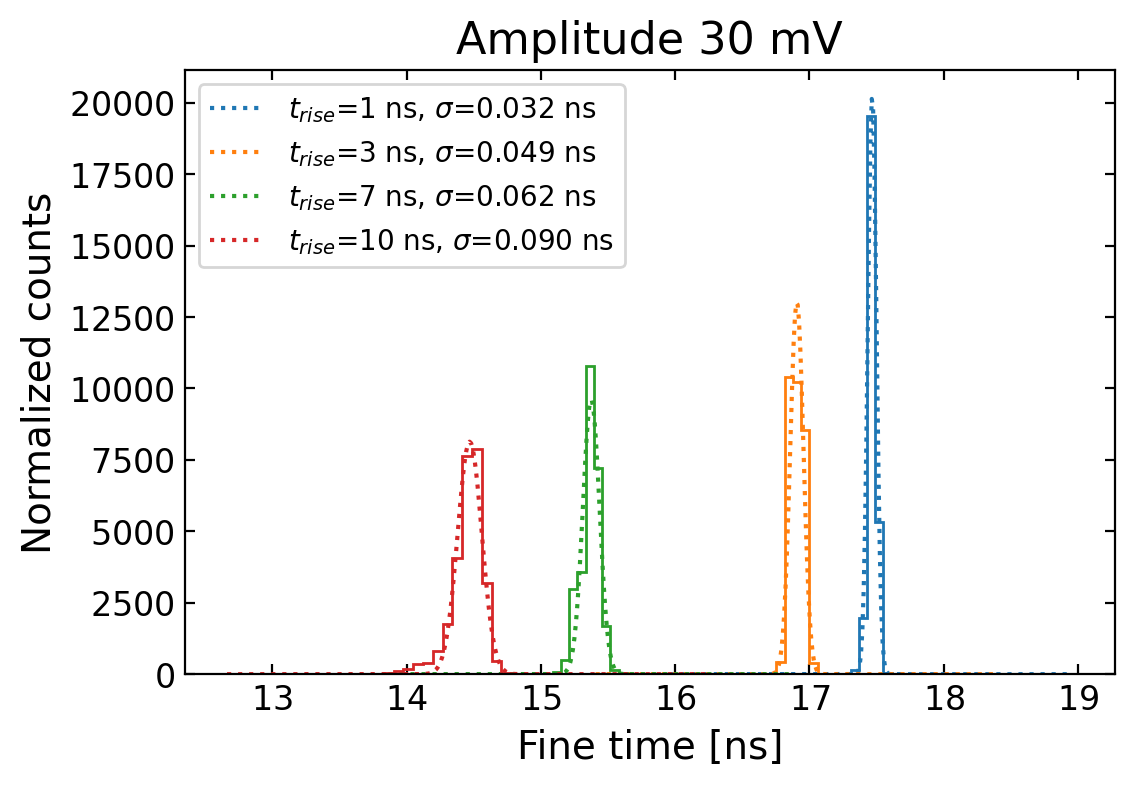

In [67]:
amplitude=30
file_idx = [38, 39, 40, 41]
risetimes=[1,3, 7, 10]

for i in range(len(file_idx)):

    filename = f"{DATA_DIR}/{file_idx[i]}.data"
    data  = pd.read_csv(filename, sep=';', on_bad_lines  = "skip", usecols=["CHARGE_0", "FINE_0","RUN_EventTimecode_ns"])
    ch = "0"
    data[f"FINE_calib_{ch}"] = finetime_calib(data[f"FINE_{ch}"], low=ftime_min, high=ftime_max)


    threshold=100

    ft_plot = data[f"FINE_calib_{ch}"][data["CHARGE_0"]>threshold]
    ft_mean = np.mean(ft_plot)
    ft_std = np.std(ft_plot)
    ft_std = max([0.1,ft_std])
    bins=np.linspace(ft_mean-15*ft_std,ft_mean+15*ft_std,50)
    bins_fit=np.linspace(ft_mean-15*ft_std,ft_mean+15*ft_std,300)
    # bins=np.linspace(5,14,60)

    n,ibins,_ = hist(ft_plot, bins=bins,label="", density=0, histtype="step", color=f"C{i}");
    # n1,ibins,_ = hist(data[f"FINE_calib_{ch}"][data["CHARGE_0"]<threshold], bins=bins,label="Dark current", density=0, histtype="step");
    bincenters=0.5*(ibins[1:]+ibins[:-1])
    yerr=np.sqrt(n);yerr[yerr==0]=1

    popt1,pcov = rt.fit_tg(bincenters,n,yerr=yerr,function="gaus",fit_range=(ft_mean-5*ft_std,ft_mean+5*ft_std))
    perr1 = np.sqrt(np.diag(pcov))
    print(popt1[2],'[ns]')
    plot(bins_fit, util.Utils.Gauss(bins_fit,*popt1),color=f"C{i}",linestyle=":",label=r"$t_{rise}$"+f"={risetimes[i]} ns, "+f"$\sigma$={popt1[2]:.3f} ns" )
# plot(bincenters, util.Utils.Gauss(bincenters,*popt1),color="C0",label=f"$\sigma$={popt1[2]:.1f}$\pm${perr1[2]:.1f} \n "+r"$\bar{x}$"+f"={popt1[1]:.1f}$\pm${perr1[1]:.1f} "  )

xlabel("Fine time [ns]")
ylabel("Normalized counts")
legend(fontsize=10,loc="best")
title(f"Amplitude {amplitude} mV")
# yscale("log")

0.032708486535663786 [ns]
0.032465194848229295 [ns]
0.038925386363738476 [ns]
0.06931098840048765 [ns]


Text(0.5, 1.0, 'Amplitude 50 mV')

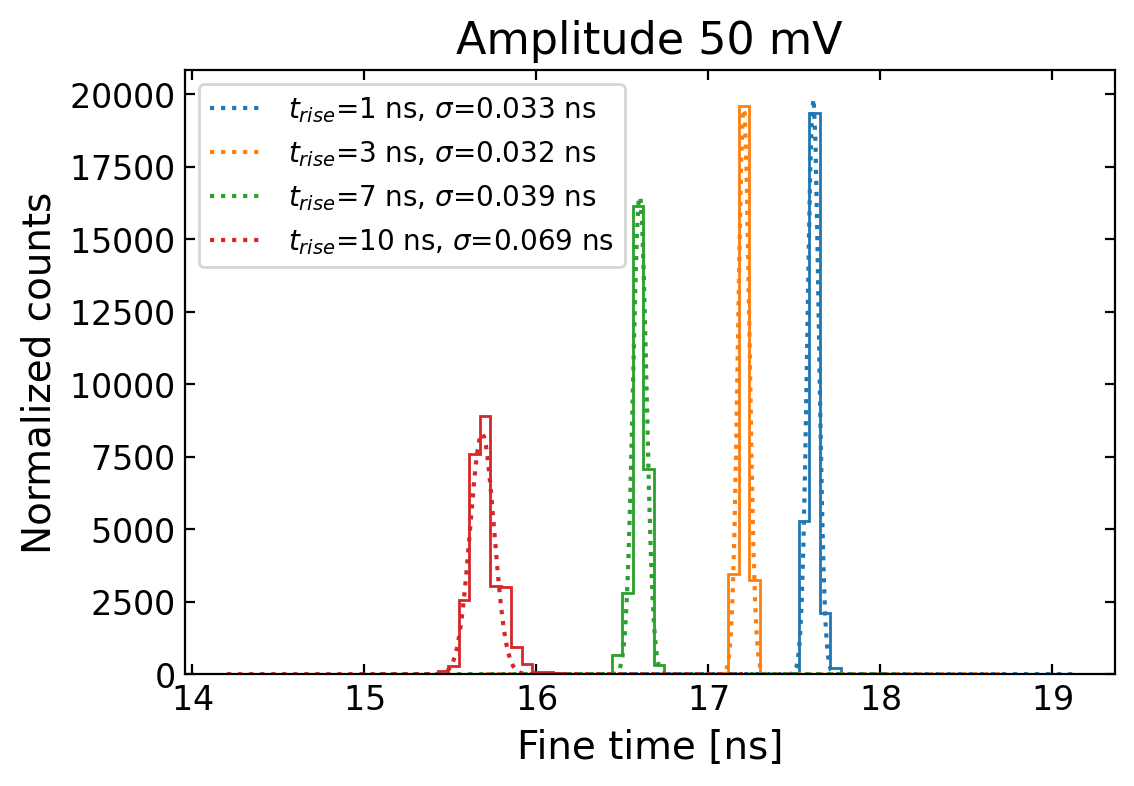

In [68]:
amplitude=50
file_idx = [42, 43, 44, 45]
risetimes=[1,3, 7, 10]

for i in range(len(file_idx)):

    filename = f"{DATA_DIR}/{file_idx[i]}.data"
    data  = pd.read_csv(filename, sep=';', on_bad_lines  = "skip", usecols=["CHARGE_0", "FINE_0","RUN_EventTimecode_ns"])
    ch = "0"
    data[f"FINE_calib_{ch}"] = finetime_calib(data[f"FINE_{ch}"], low=ftime_min, high=ftime_max)


    threshold=100

    ft_plot = data[f"FINE_calib_{ch}"][data["CHARGE_0"]>threshold]
    ft_mean = np.mean(ft_plot)
    ft_std = np.std(ft_plot)
    ft_std = max([0.1,ft_std])
    bins=np.linspace(ft_mean-15*ft_std,ft_mean+15*ft_std,50)
    bins_fit=np.linspace(ft_mean-15*ft_std,ft_mean+15*ft_std,300)
    # bins=np.linspace(5,14,60)

    n,ibins,_ = hist(ft_plot, bins=bins,label="", density=0, histtype="step", color=f"C{i}");
    # n1,ibins,_ = hist(data[f"FINE_calib_{ch}"][data["CHARGE_0"]<threshold], bins=bins,label="Dark current", density=0, histtype="step");
    bincenters=0.5*(ibins[1:]+ibins[:-1])
    yerr=np.sqrt(n);yerr[yerr==0]=1

    popt1,pcov = rt.fit_tg(bincenters,n,yerr=yerr,function="gaus",fit_range=(ft_mean-5*ft_std,ft_mean+5*ft_std))
    perr1 = np.sqrt(np.diag(pcov))
    print(popt1[2],'[ns]')
    plot(bins_fit, util.Utils.Gauss(bins_fit,*popt1),color=f"C{i}",linestyle=":",label=r"$t_{rise}$"+f"={risetimes[i]} ns, "+f"$\sigma$={popt1[2]:.3f} ns" )
# plot(bincenters, util.Utils.Gauss(bincenters,*popt1),color="C0",label=f"$\sigma$={popt1[2]:.1f}$\pm${perr1[2]:.1f} \n "+r"$\bar{x}$"+f"={popt1[1]:.1f}$\pm${perr1[1]:.1f} "  )

xlabel("Fine time [ns]")
ylabel("Normalized counts")
legend(fontsize=10,loc="best")
title(f"Amplitude {amplitude} mV")
# yscale("log")

---

In [9]:
files = ["4.data", "6.data", "11.data", "13.data"]

labels = ["Waveform Generator", "SiPM, Gain 820", "SiPM, Gain 420", "Waveform Generator, new"]

Data = []
ch=0
for filename in files:
    data  = pd.read_csv(f"{DATA_DIR}/{filename}", sep=';', on_bad_lines  = "skip", usecols=[f"CHARGE_{ch}", f"FINE_{ch}","RUN_EventTimecode_ns"])
    data[f"FINE_calib_{ch}"] = finetime_calib(data[f"FINE_{ch}"])
    Data.append(data)
    

(0.0, 1050.0)

findfont: Font family ['san-serif'] not found. Falling back to DejaVu Sans.


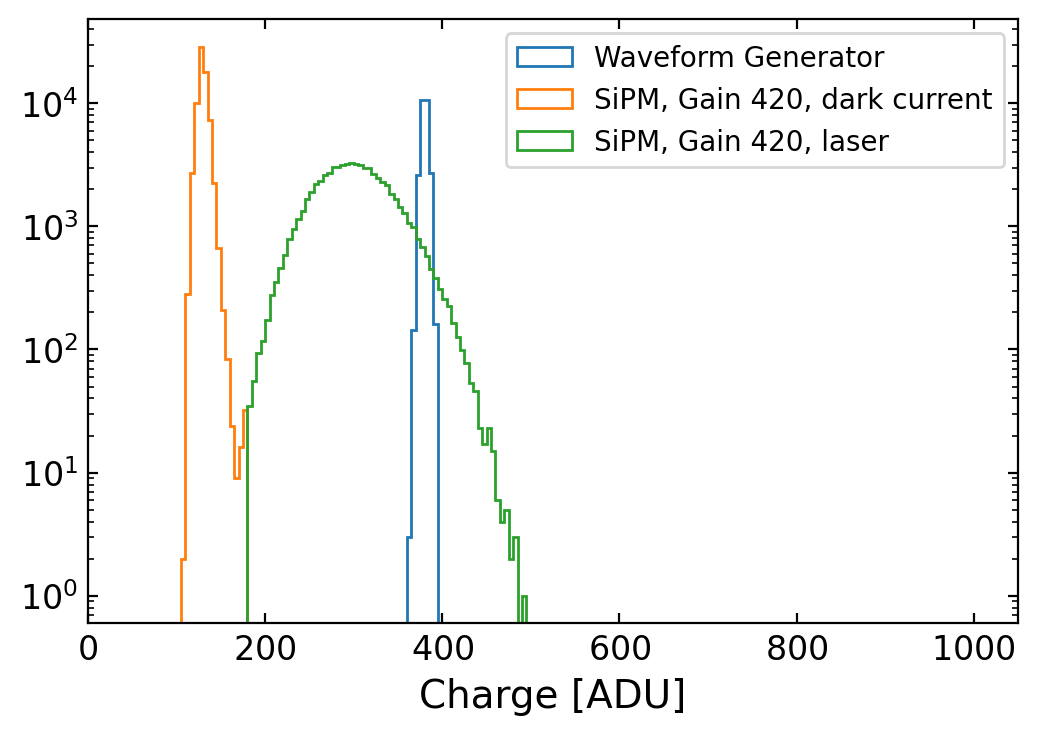

In [11]:
hist(Data[0].CHARGE_0[Data[0]["CHARGE_0"]>300],histtype="step",bins=200,range=(0,1000),label=labels[0]);
# hist(Data[1].CHARGE_0,histtype="step",bins=200,range=(0,1000),label=labels[1]+", dark current");
hist(Data[2].CHARGE_0[Data[2]["CHARGE_0"]<180],histtype="step",bins=200,range=(0,1000),label=labels[2]+", dark current");
hist(Data[2].CHARGE_0[Data[2]["CHARGE_0"]>180],histtype="step",bins=200,range=(0,1000),label=labels[2]+", laser");
# hist(Data[3].CHARGE_0[Data[2]["CHARGE_0"]>180],histtype="step",bins=200,range=(0,1000),label=labels[2]+", laser");
# hist(Data[2].CHARGE_0[data2["CHARGE_0"]>180],bins=100,range=(0,1000));
xlabel("Charge [ADU]")
yscale("log")
legend(fontsize=10)
xlim(0,)

Waveform Generator  std(n)=0.0050
SiPM, Gain 820, dark current  std(n)=499.0695
SiPM, Gain 420, dark current  std(n)=0.0116
SiPM, Gain 420, laser  std(n)=0.0048


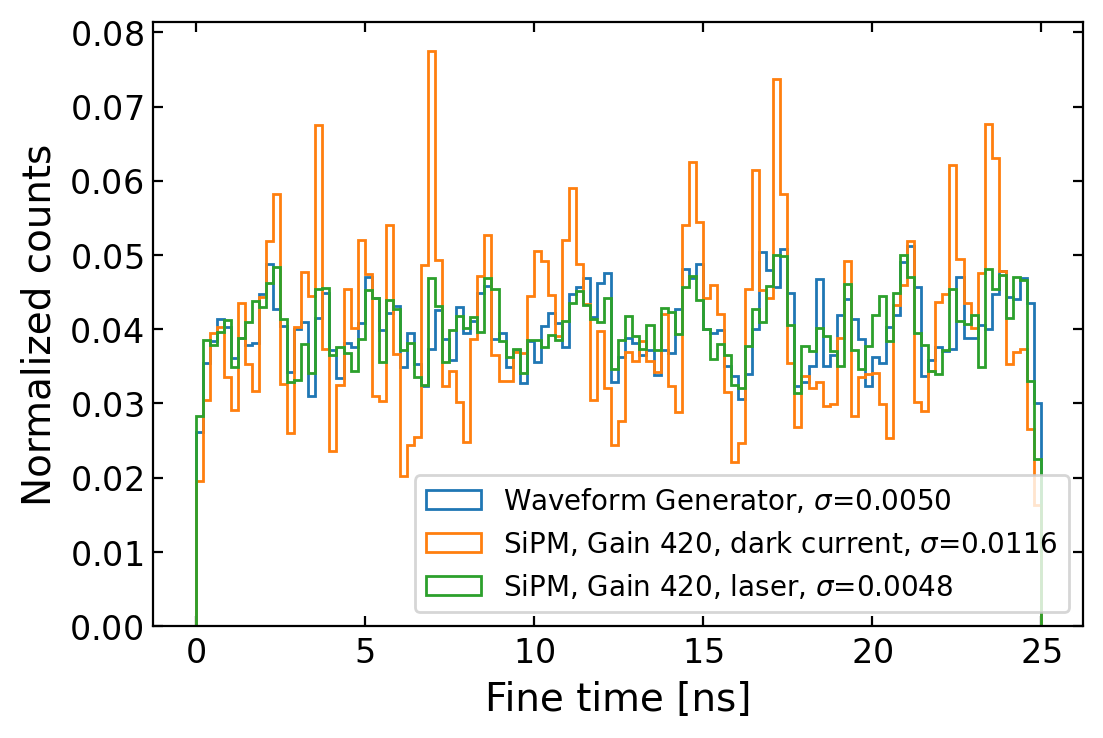

In [34]:
# FINE_21_calib = finetime_calib(data[f"FINE_{ch}"])
bins=np.linspace(0,25,121)

n0,ibins,_ = hist(Data[0][f"FINE_calib_{ch}"][Data[0]["CHARGE_0"]>300], bins=bins,label=labels[0], density=1, histtype="step");
# n1,ibins,_ = hist(Data[1][f"FINE_calib_{ch}"], bins=bins,label=labels[1]+", dark current", density=1, histtype="step");
n2,ibins,_ = hist(Data[2][f"FINE_calib_{ch}"][Data[2]["CHARGE_0"]<180], bins=bins,label=labels[2]+", dark current", density=1, histtype="step");
n3,ibins,_ = hist(Data[2][f"FINE_calib_{ch}"][Data[2]["CHARGE_0"]>180], bins=bins,label=labels[2]+", laser", density=1, histtype="step");
# n4,ibins,_ = hist(Data[3][f"FINE_calib_{ch}"][Data[2]["CHARGE_0"]>180], bins=bins,label=labels[3], density=1, histtype="step");

print(f"{labels[0]:<15}", f" std(n)={std(n0):.4f}")
print(f"{labels[1]}, dark current", f" std(n)={std(n1):.4f}")
print(f"{labels[2]}, dark current", f" std(n)={std(n2):.4f}")
print(f"{labels[2]}, laser", f" std(n)={std(n3):.4f}")
# print(f"{labels[3]}, laser", f" std(n)={std(n4):.4f}")


# bincenters = 0.5*(ibins[1:]+ibins[:-1])
# peak_inds = scipy.signal.find_peaks_cwt(n, [2,3], min_snr=1.2)
# print(peak_inds)
# for ipeak in range(2):
#     i0 = bincenters[peak_inds[ipeak]]
#     for i in range(4):
#         axvline(i0+25/4*i,color=f"C{ipeak+1}",linestyle="--")

        

xlabel("Fine time [ns]")
ylabel("Normalized counts")
handles, labels_this = gca().get_legend_handles_labels()
labels_this[0] = labels_this[0] + f", $\sigma$={std(n0):.4f}"
labels_this[1] = labels_this[1] + f", $\sigma$={std(n2):.4f}"
labels_this[2] = labels_this[2] + f", $\sigma$={std(n3):.4f}"
# labels_this[3] = labels_this[3] + f", $\sigma$={std(n3):.4f}"
legend(handles, labels_this, loc="lower right",fontsize=10)
# grid()

In [11]:
lines

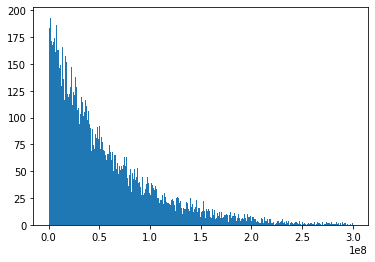

In [10]:
hist(np.diff(data["RUN_EventTimecode_ns"]),bins=300,range=(0,30e7));
# yscale("log")

In [6]:
# for i in range(len(config)):
#     print(f"#{i},", config[i])

In [ ]:
def replace_str_index(text,index=0,replacement=''):
    return '%s%s%s'%(text[:index],replacement,text[index+1:])

5: no fiber
6: with fiber, threshold 900
7: with fiber, threshold 970

In [35]:
filenames = {0: ["5.data", "No fiber"],
            1: ["6.data", "Threshold 900"],
             2: ["7.data", "Threshold 970"],
             3: ["8.data", "LED low, threshold 900"],
             4: ["10.data", "LED high, threshold 970"],
            5:["11.data", "Dark current, threshold 900"],
            6:["12.data", "LED high, threshold 900"]}

Data = {}
for key in filenames:
    filename = filenames[key][0]
    data  = pd.read_csv(filename, sep=';', on_bad_lines  = "skip")
    Data[key] = data

# ch = "21"
ch = "0"

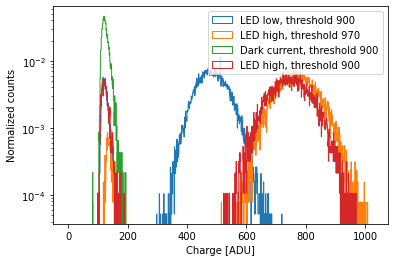

In [36]:
for key in filenames:
    if key<=2:
        continue
    data = Data[key]

    FINE_21_calib = data[f"CHARGE_{ch}"]
    bins=np.linspace(0,1024,1023)
    n,ibins,_ = hist(FINE_21_calib, bins=bins, histtype= "step", label = filenames[key][1], density=1);
    
legend()
xlabel("Charge [ADU]")
ylabel("Normalized counts")
yscale("log")

In [ ]:
for key in [5,3]:
    data = Data[key]

    FINE_21_calib = finetime_calib(data[f"FINE_{ch}"])
    bins=np.linspace(0,25,80)
    n,ibins,_ = hist(FINE_21_calib, bins=bins, color=f"C{key-3}", histtype= "step", label = filenames[key][1], density=1);
    print(filenames[key][1], f", std: {np.std(n)}")
    
legend()
xlabel("Fine time [ns]")
ylabel("Normalized counts")
show()

for key in [3,6,4]:
    data = Data[key]

    FINE_21_calib = finetime_calib(data[f"FINE_{ch}"])
    charge = data[f"CHARGE_{ch}"]
    bins=np.linspace(0,25,80)
    n,ibins,_ = hist(FINE_21_calib[charge>400], bins=bins, color=f"C{key-3}", histtype= "step", label = filenames[key][1], density=1);
    print(filenames[key][1], f", std: {np.std(n)}")
    
legend(loc=(1,0))
xlabel("Fine time [ns]")
ylabel("Normalized counts")

---

In [2]:
import h5py
import matplotlib.ticker as ticker

In [4]:
# DATA_DIR = "/project/rrg-mdiamond/tomren/mudata/MP0100/"
# f = h5py.File(f'{DATA_DIR}/Scope/DT5550_noise_hunting/preamp-out-default.h5', 'r')
# np.array(f["Waveforms"]['Channel 4']['Channel 4Data'][:])
# f.close()

array([-1823, -1296,  -852, ..., -1533, -1867, -1770], dtype=int16)

# ASIC A, preamp out 

In [3]:
DATA_DIR = "/project/rrg-mdiamond/tomren/mudata/MP0100/"

files = ["preamp-out-during-redout.h5",
         "preamp-out-default.h5",
"preamp-out-firmwaremod-2.h5",]

labels = ["During digital readout", "Digital readout stopped", "Clock disabled"]

Data = []
for filename in files:
    f = h5py.File(f'{DATA_DIR}/Scope/DT5550_noise_hunting/{filename}', 'r')    
    Data.append(np.array(f["Waveforms"]['Channel 4']['Channel 4Data'][:]))
    f.close()

In [4]:
Data_fft=[]
for data in Data:
    Data_fft.append(np.fft.rfft(data))
freq = np.fft.rfftfreq(n=len(Data[0]),d=1/3_200_000_000)

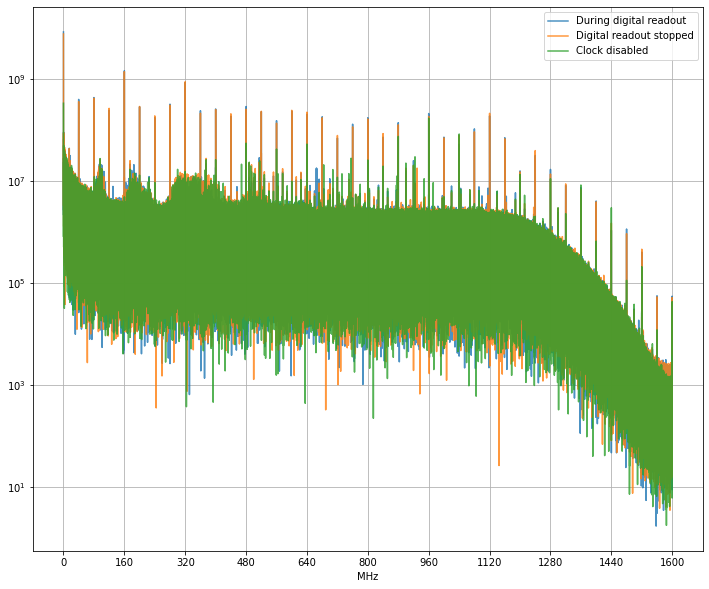

In [5]:
figure(figsize=(12,10))
for i, data_fft in enumerate(Data_fft):
    if i<2:
        plot(freq/1e6, np.abs(data_fft),alpha=0.8, label=labels[i])
    else:
        plot(freq/1e6, np.abs(data_fft)/2,alpha=0.8, label=labels[i])    
    
    
gca().xaxis.set_major_locator(ticker.MultipleLocator(160))    
grid()
xlabel("MHz")
yscale("log")
legend()

# ASIC A vs ASIC C

In [6]:
DATA_DIR = "/project/rrg-mdiamond/tomren/mudata/MP0100/"

files = ["preamp-out-default.h5","preamp-out-default-asic-c.h5",]

labels = ["ASIC A (with pitch adapter)","ASIC C (w/o pitch adapter)"]

Data = []
for filename in files:
    f = h5py.File(f'{DATA_DIR}/Scope/DT5550_noise_hunting/{filename}', 'r')    
    Data.append(np.array(f["Waveforms"]['Channel 4']['Channel 4Data'][:]))
    f.close()

In [7]:
Data_fft=[]
for data in Data:
    Data_fft.append(np.fft.rfft(data))
freq = np.fft.rfftfreq(n=len(Data[0]),d=1/3_200_000_000)

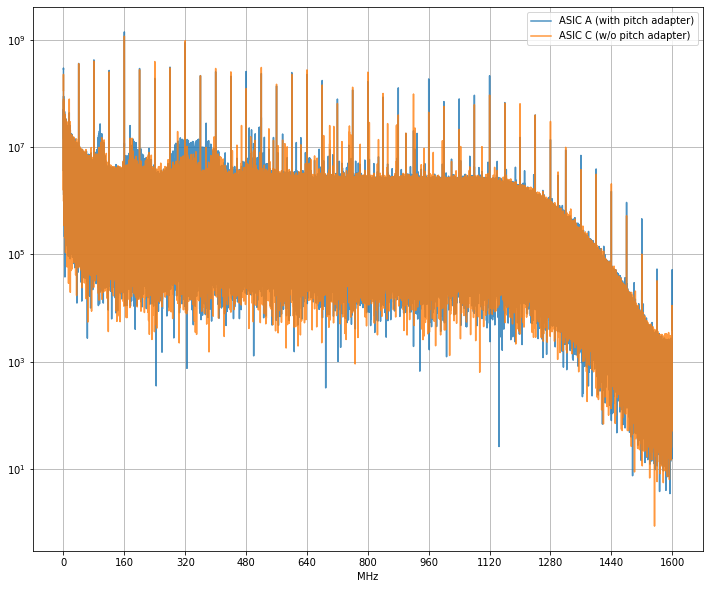

In [12]:
figure(figsize=(12,10))
for i, data_fft in enumerate(Data_fft):
    if i<2:
        plot(freq[1:]/1e6, np.abs(data_fft)[1:],alpha=0.8, label=labels[i])
    else:
        plot(freq[1:]/1e6, np.abs(data_fft)[1:]/2,alpha=0.8, label=labels[i])    
    
    
gca().xaxis.set_major_locator(ticker.MultipleLocator(160))    
grid()
xlabel("MHz")
yscale("log")
legend()
# xscale("log")

In [34]:
DATA_DIR = "/project/rrg-mdiamond/tomren/mudata/MP0100/"

files = ["time-threshold-during-readout.h5",
         "time-threshold-default.h5",
"time-threshold-firmwaremod.h5",]

Data = []
for filename in files:
    f = h5py.File(f'{DATA_DIR}/Scope/DT5550_noise_hunting/{filename}', 'r')    
    Data.append(np.array(f["Waveforms"]['Channel 4']['Channel 4Data'][:]))
    f.close()

In [35]:
Data_fft=[]
for data in Data:
    Data_fft.append(np.fft.rfft(data))
freq = np.fft.rfftfreq(n=len(Data[0]),d=1/3_200_000_000)

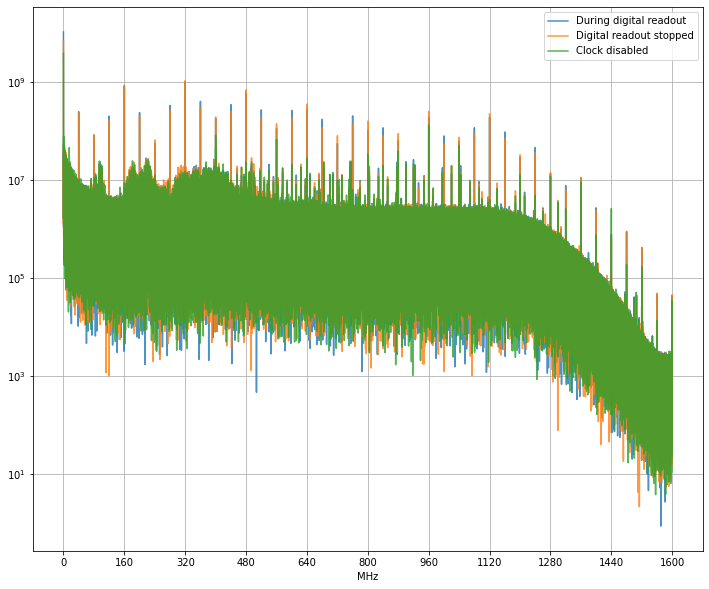

In [36]:
figure(figsize=(12,10))
for i, data_fft in enumerate(Data_fft):
    plot(freq/1e6, np.abs(data_fft),alpha=0.8, label=labels[i])
    
    
gca().xaxis.set_major_locator(ticker.MultipleLocator(160))    
grid()
xlabel("MHz")
yscale("log")
legend()